In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, chi2
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [4]:
# read file csv into dataframe
df = pd.read_csv('data.csv')

In [5]:
# view infoattributes and datatypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  NumberOfTrips             4748 non-null   float64
 12  PitchSatisfactionScore    4888 non-null   int64  
 13  NumberOfChildrenVisiting  4822 non-null   float64
 14  MonthlyI

In [6]:
df.sample(5, random_state=100)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,PitchSatisfactionScore,NumberOfChildrenVisiting,MonthlyIncome,Weather,review_text
3476,203476,1,40.0,Company Invited,1,9.0,Female,3,5.0,Basic,5.0,4.0,3,1.0,22324.0,rain,Excellent facilities in a well connected and w...
1011,201011,0,36.0,Self Enquiry,3,9.0,Fe Male,2,3.0,Deluxe,4.0,4.0,4,1.0,24278.0,fog,"The apartment was beautiful, lots of clean tow..."
159,200159,0,34.0,Company Invited,3,8.0,Female,3,3.0,Basic,3.0,7.0,5,2.0,17231.0,rain,Christos and Aspa were wonderful hosts and the...
2477,202477,1,40.0,Self Enquiry,3,12.0,Male,3,4.0,Deluxe,3.0,5.0,2,2.0,20764.0,rain,"Really nice stay in Athens, very clean and com..."
291,200291,0,36.0,Self Enquiry,1,NaN,Male,1,3.0,Deluxe,4.0,5.0,2,0.0,19485.0,rain,Enely was a great host. She provided me with a...


In [7]:
df.select_dtypes(exclude='object').describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.00,3.0,4.00,5.0


In [9]:
df.select_dtypes(include='object').describe().T

,count,unique,top,freq
TypeofContact,4863,2,Self Enquiry,3444
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842
Weather,4888,11,rain,2982
review_text,4888,4876,The host canceled this reservation the day bef...,5


In [10]:
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts(normalize=True)*100)
    print('--------------')

Self Enquiry       70.820481
Company Invited    29.179519
Name: TypeofContact, dtype: float64
--------------
Male       59.656301
Female     37.172668
Fe Male     3.171031
Name: Gender, dtype: float64
--------------
Basic           37.684124
Deluxe          35.433715
Standard        15.180033
Super Deluxe     6.996727
King             4.705401
Name: ProductPitched, dtype: float64
--------------
rain       61.006547
sun        18.821604
fog        14.689034
drizzle     1.084288
wed         0.716039
thu         0.716039
fri         0.716039
sat         0.675123
snow        0.531915
mon         0.531915
tue         0.511457
Name: Weather, dtype: float64
--------------
The host canceled this reservation the day before arrival. This is an automated posting.                                                                                                                                                                                                                                              

In [15]:
nums_cols = df.select_dtypes(exclude='object').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()
    

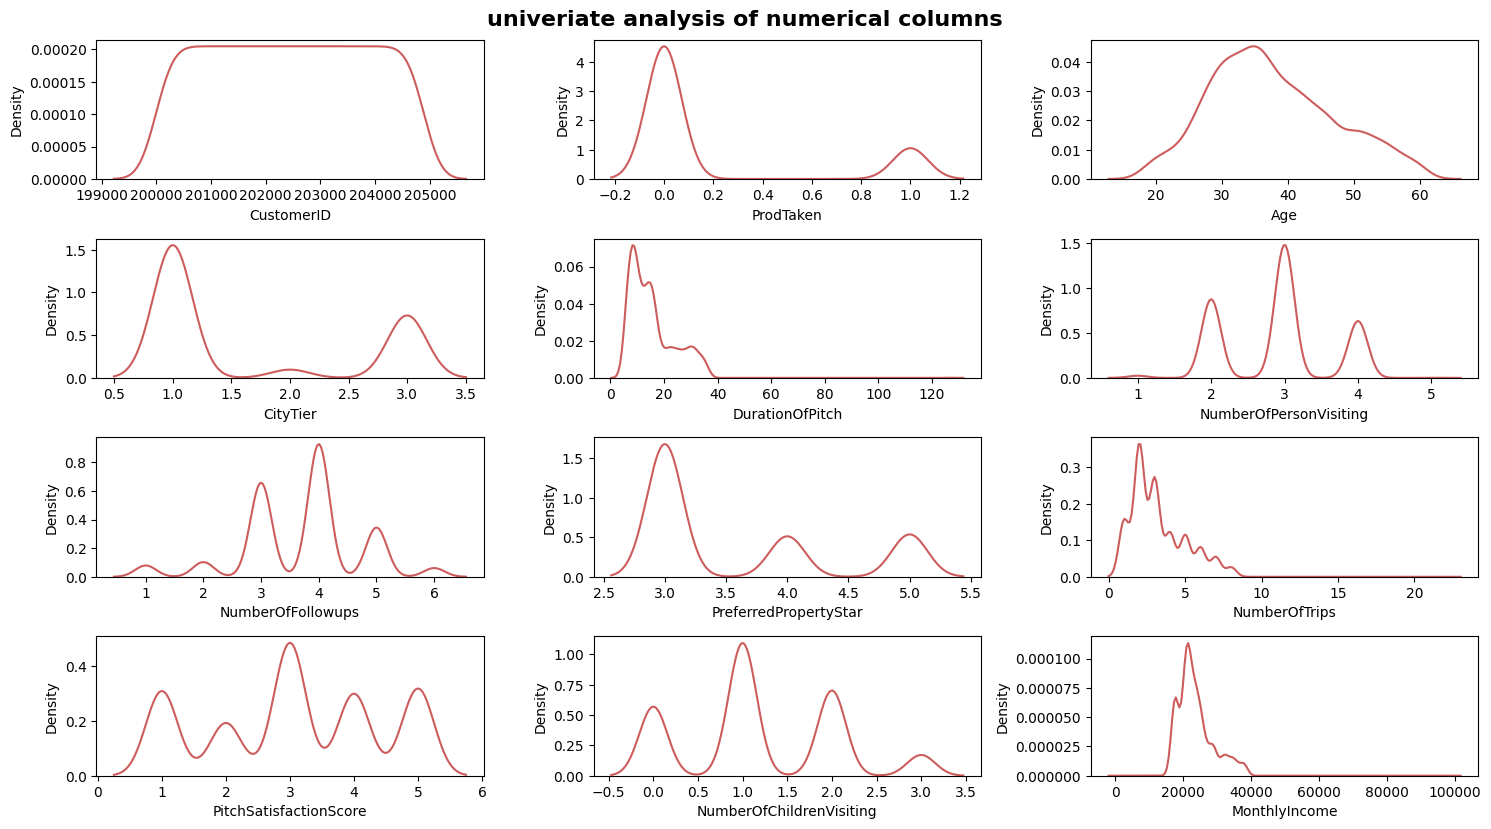

In [18]:
plt.figure(figsize=(15, 10))
plt.suptitle('univeriate analysis of numerical columns', fontsize=16, fontweight='bold')
for i in range(0, len(nums_cols)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[nums_cols[i]], color='indianred')
    plt.xlabel(nums_cols[i])
    plt.tight_layout()

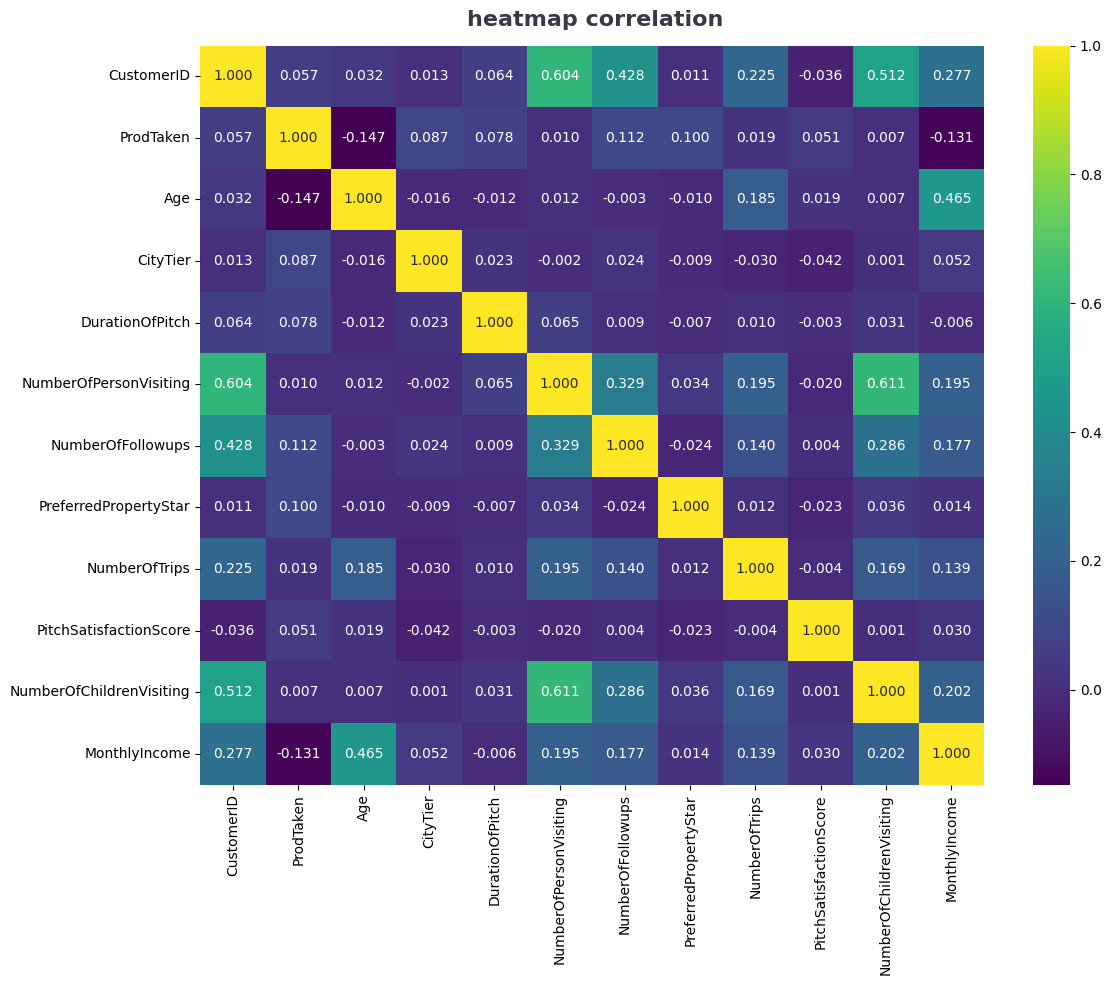

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.3f', cmap='viridis')
plt.suptitle('heatmap correlation', color='#3c3744', fontsize=16, fontweight='bold')
plt.tight_layout()

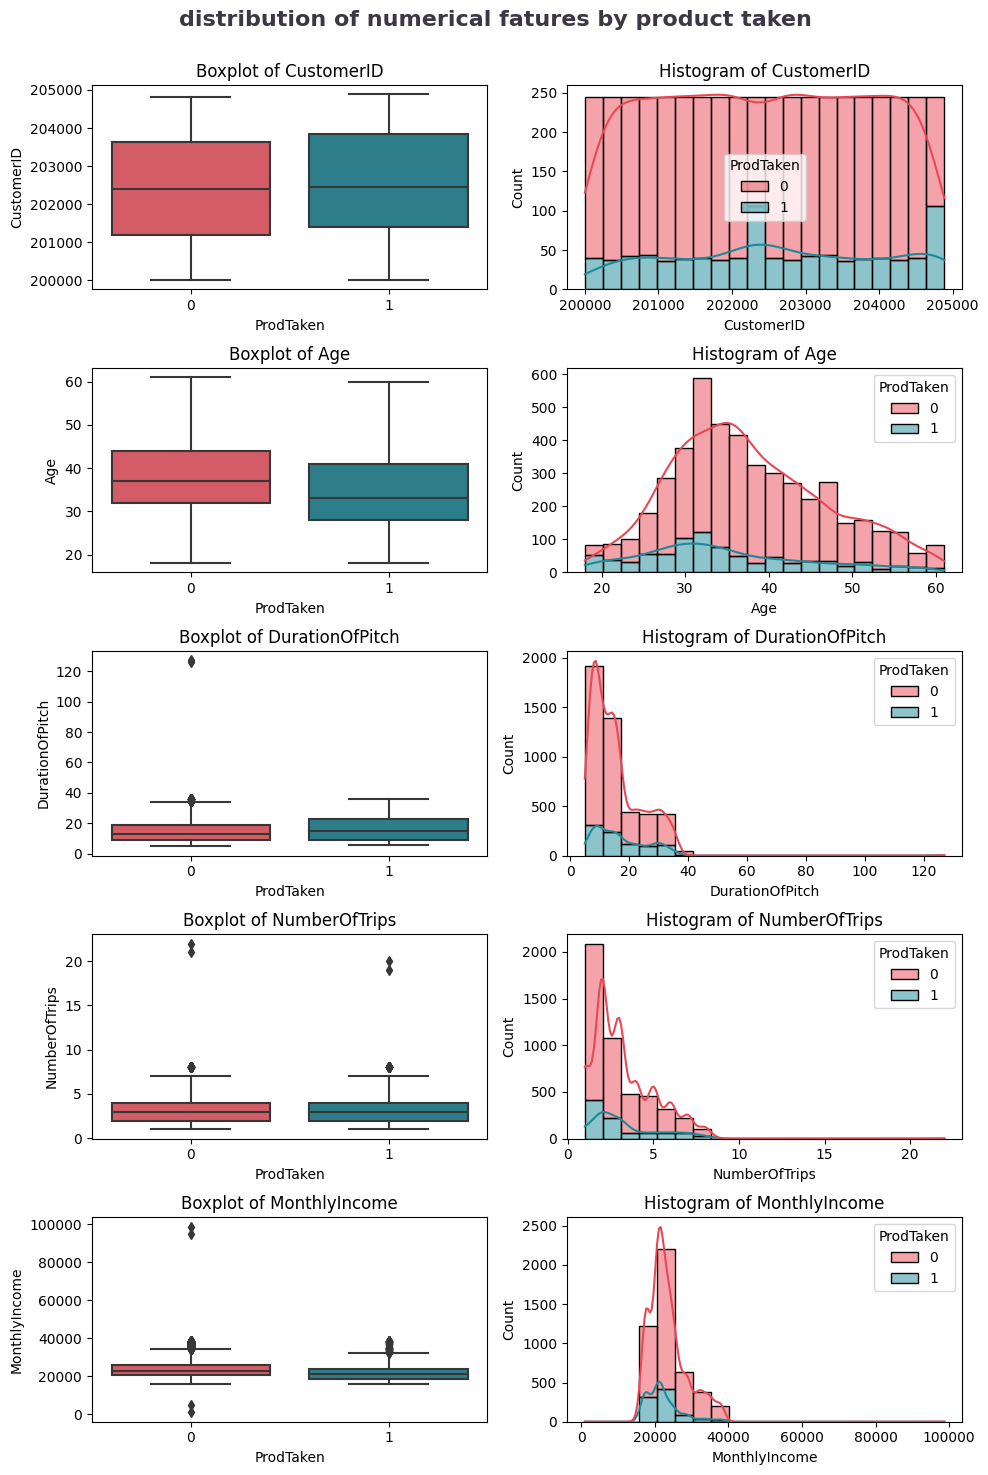

In [27]:
nums_cols2 = ['CustomerID', 'Age', 'DurationOfPitch', 'NumberOfTrips','MonthlyIncome']
clr1 = ['#E84855', '#1D8A99']
fig, ax = plt.subplots(5, 2, figsize=(10, 15))
fig.suptitle('distribution of numerical fatures by product taken',color='#3c3744', fontsize=16, fontweight='bold', ha='center')
for i, col in enumerate(nums_cols2):
    sns.boxplot(data=df, x='ProdTaken',y=col, palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='ProdTaken',bins=20, kde=True,multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.93)

KeyError: "['Occupation', 'MaritalStatus', 'PreferredPrope', 'Passport', 'PitchStatisfactionScore', 'OwnCar'] not in index"

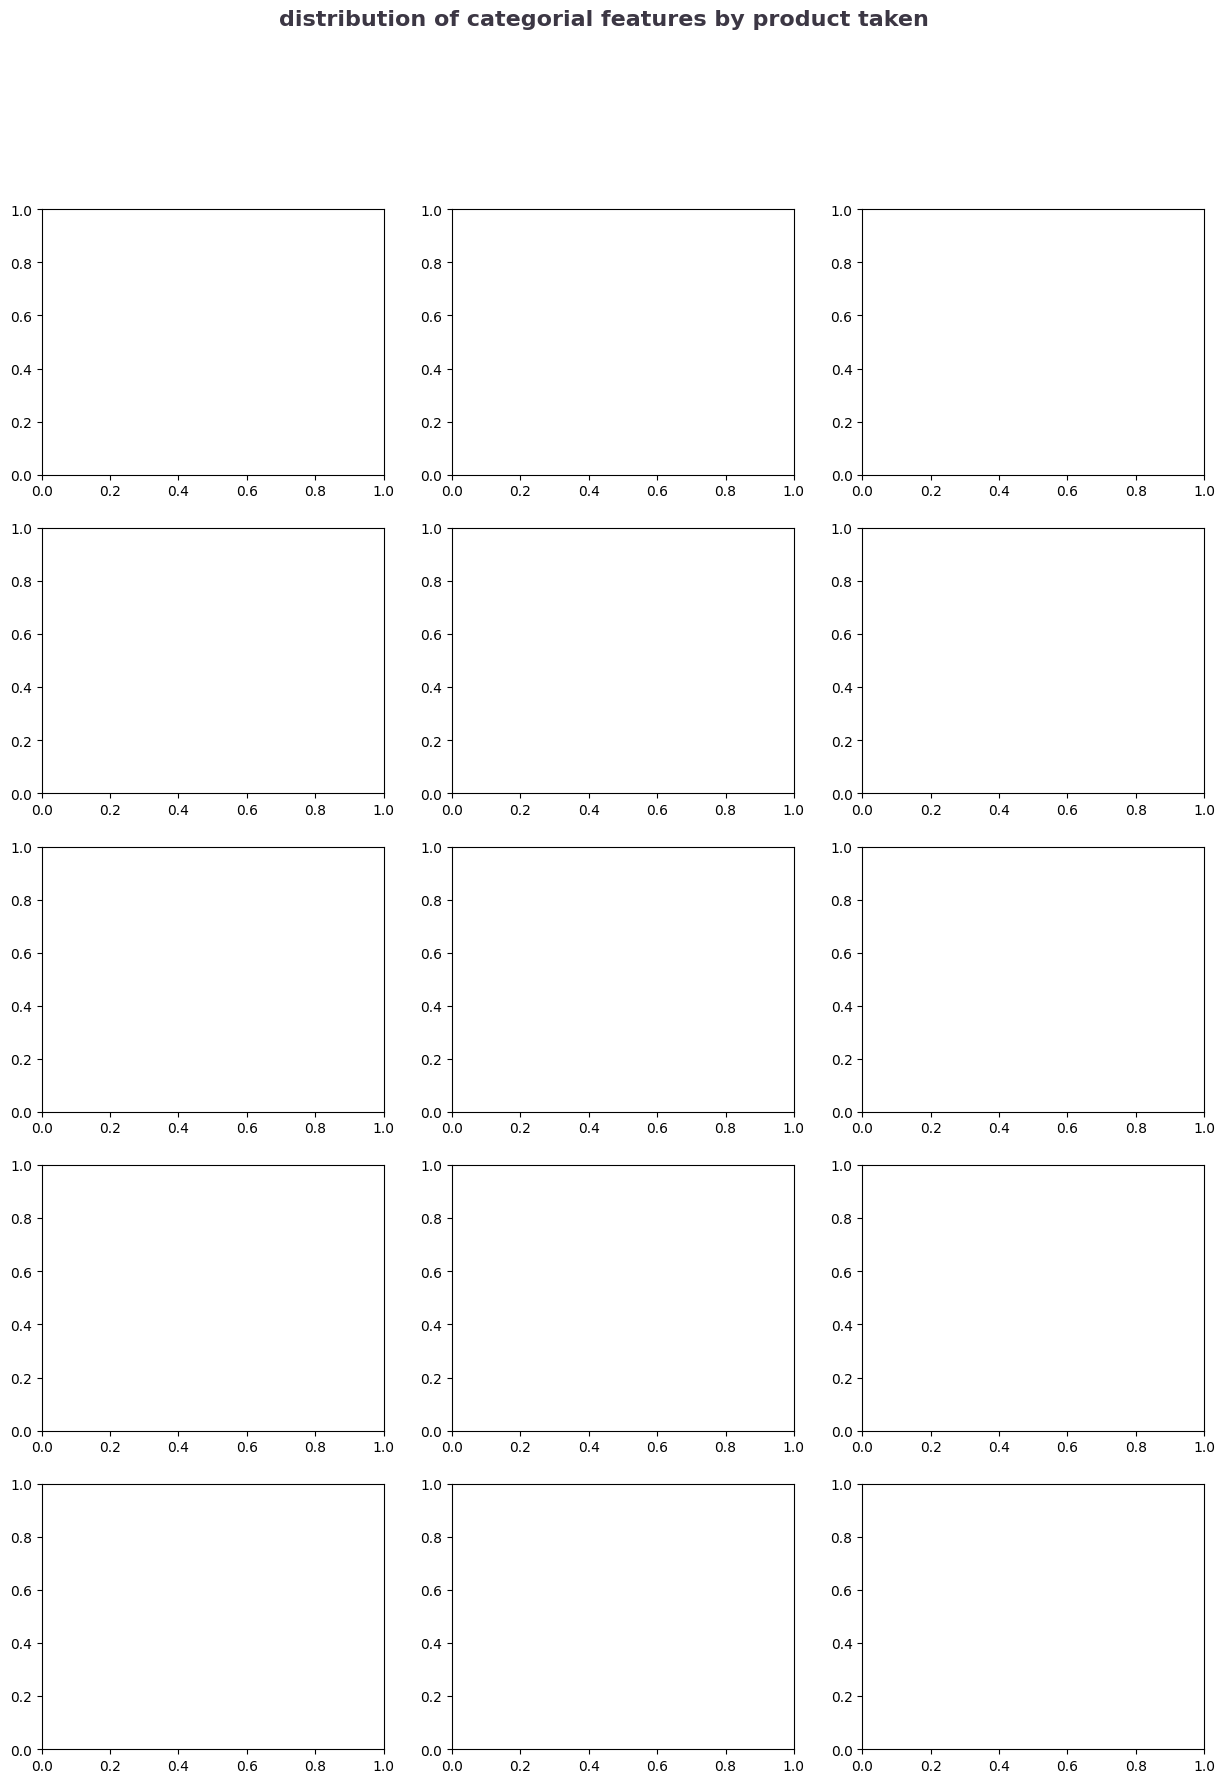

In [9]:
from matplotlib import pyplot as plt
cat_cols2=['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'CityTier', 'NumberOfPersonVisiting', 'NumberOfFollowups', 'PreferredPrope','Passport', 'PitchStatisfactionScore', 'OwnCar', 'NumberOfChildrenVisiting']
clr2 = ['#E84855', '1D8A99']
fig, axes = plt.subplots(5, 3, figsize=(15, 20))
fig.suptitle('distribution of categorial features by product taken', color='#3C3744', fontsize=16, fontweight='bold')
for ax, col in zip(axes.flatten(), df[cat_cols2].columns):
    sns.countplot(data=df, x=col, hue='ProdTaken', palette=clr2, ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=12)
    ax.set_ylabel('')
axes[4,2].axis('off')
fig.tight_layout()
fig.subplots_adjust(top=0.93)